## windows changing to count FLB
We need two types of FLB to check.
- Fixed FLB for each game
- timely FLB for each game

### count by windows
set window's width, go through whole set and group all obvers in this windows to count. Calculate the percentage of winners in this windows as this of median one.

median $\in$ $[ 0, 1 ]$

In [30]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import Rbf
folder_path = '../../datasets/rawdata'
prob_folder_path = '../../datasets/probability'
FLB_folder_path = '../../datasets/FLB'
resam_folder_path = '../../datasets/resample_by_min'
games = { 'baseball':'/baseball/mlb','basketball':'/basketball/nba','football':'/football/nfl',
            'iceball': '/iceball/nhl','soccer_champion':'/soccer/champ_league','scoccer_england':'/soccer/epl',
            'soccer_major':'/soccer/majorleague'}
# folder name is games, result name is games_results.csv

games_list = ['baseball','iceball',
              'soccer_champion','scoccer_england','soccer_major',
              'soccer',
              'soccer_home','soccer_away','soccer_draw']

In [78]:
def generate_percentage_winners(count_df,windows_weight,left,right):
    perc_winnners_obv = pd.DataFrame(columns = ['price','perc_winner'])
    medians = np.array(range(101))/100
    
    for median in medians:
        window_low = median - windows_weight
        window_high = median + windows_weight
        obv_in_windows = count_df[(count_df.iloc[:,0]<=window_high) & (count_df.iloc[:,0]>=window_low)]
        win_obv_in_windows = obv_in_windows[obv_in_windows['HOME_WIN']==True]
        if len(obv_in_windows) < 1:
            continue
        percentage_ = round(len(win_obv_in_windows)/len(obv_in_windows),3)
#         perc_winnners_obv[median] = percentage_
        perc_winnners_obv = perc_winnners_obv.append({'price':median,'perc_winner':percentage_},ignore_index =True)
    perc_winnners_obv = perc_winnners_obv.loc[left:right]
    perc_winnners_obv = perc_winnners_obv.append({'price':0.0,'perc_winner':0.0},ignore_index =True)
    perc_winnners_obv = perc_winnners_obv.append({'price':1.0,'perc_winner':1.0},ignore_index =True)
    perc_winnners_obv = perc_winnners_obv.sort_values(by=['price']).reset_index(drop=True)
    return perc_winnners_obv

### iceball

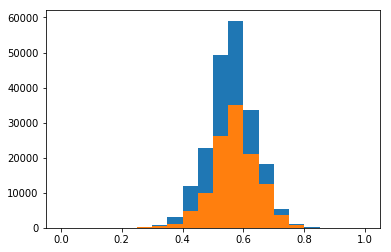

In [75]:
# check histogram
bins_num=20
game_name = 'iceball'
count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')

counts, middiam, objs = plt.hist(count_df.iloc[:,0],range=(0,1),bins=bins_num)
win_counts, middiam, objs = plt.hist(count_df[count_df['HOME_WIN']==True].iloc[:,0],range=(0,1),bins=bins_num)
# the percentage of winners
perc_winners = win_counts/(counts+1e-8)
time_period = (middiam[1]-middiam[0])/2
probabilities = [i + time_period for i in middiam[:-1]]

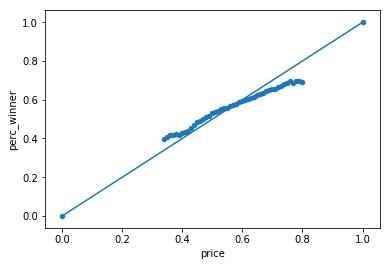

In [79]:
windows_weight = 0.1
for game_name in [ 'iceball']:
# for game_name in [ 'soccer_home','soccer_away','soccer_draw']:
    count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')
    perc_ = generate_percentage_winners(count_df,windows_weight,20,66)
    perc_.plot.scatter(x=0,y=1)
    plt.plot([0,1])
    perc_.to_csv(FLB_folder_path+'/'+game_name+'_fixed.csv',index=False)

### baseball

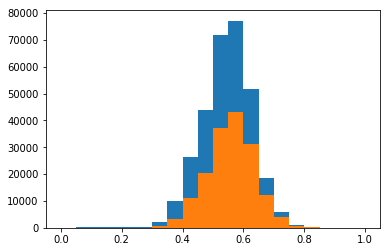

In [32]:
# check histogram
bins_num=20
game_name = 'baseball'
count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')

counts, middiam, objs = plt.hist(count_df.iloc[:,0],range=(0,1),bins=bins_num)
win_counts, middiam, objs = plt.hist(count_df[count_df['HOME_WIN']==True].iloc[:,0],range=(0,1),bins=bins_num)
# the percentage of winners
perc_winners = win_counts/(counts+1e-8)
time_period = (middiam[1]-middiam[0])/2
probabilities = [i + time_period for i in middiam[:-1]]

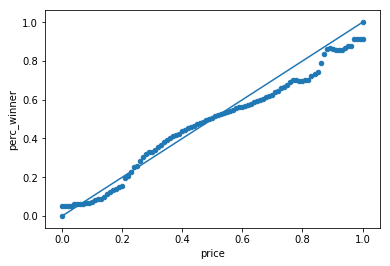

In [81]:
windows_weight = 0.1
for game_name in [ 'baseball']:
# for game_name in [ 'soccer_home','soccer_away','soccer_draw']:
    count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')
    perc_ = generate_percentage_winners(count_df,windows_weight,0,100)
    perc_.plot.scatter(x=0,y=1)
    plt.plot([0,1])
    perc_.to_csv(FLB_folder_path+'/'+game_name+'_fixed.csv',index=False)

### soccer

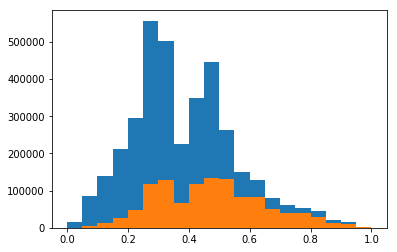

In [45]:
# check histogram
bins_num=20
game_name = 'soccer'
count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')

counts, middiam, objs = plt.hist(count_df.iloc[:,0],range=(0,1),bins=bins_num)
win_counts, middiam, objs = plt.hist(count_df[count_df['HOME_WIN']==True].iloc[:,0],range=(0,1),bins=bins_num)
# the percentage of winners
perc_winners = win_counts/(counts+1e-8)
time_period = (middiam[1]-middiam[0])/2
probabilities = [i + time_period for i in middiam[:-1]]

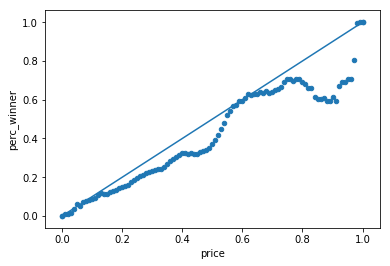

In [82]:
windows_weight = 0.05
for game_name in [ 'soccer']:
# for game_name in [ 'soccer_home','soccer_away','soccer_draw']:
    count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')
    perc_ = generate_percentage_winners(count_df,windows_weight,0,100)
    perc_.plot.scatter(x=0,y=1)
    plt.plot([0,1])
    perc_.to_csv(FLB_folder_path+'/'+game_name+'_fixed.csv',index=False)

### soccer home

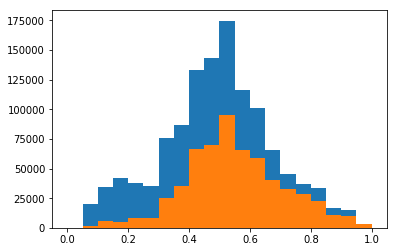

In [48]:
# check histogram
bins_num=20
game_name = 'soccer_home'
count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')

counts, middiam, objs = plt.hist(count_df.iloc[:,0],range=(0,1),bins=bins_num)
win_counts, middiam, objs = plt.hist(count_df[count_df['HOME_WIN']==True].iloc[:,0],range=(0,1),bins=bins_num)
# the percentage of winners
perc_winners = win_counts/(counts+1e-8)
time_period = (middiam[1]-middiam[0])/2
probabilities = [i + time_period for i in middiam[:-1]]

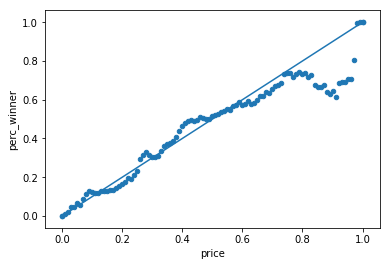

In [83]:
windows_weight = 0.05
for game_name in [ 'soccer_home']:
# for game_name in [ 'soccer_home','soccer_away','soccer_draw']:
    count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')
    perc_ = generate_percentage_winners(count_df,windows_weight,0,100)
    perc_.plot.scatter(x=0,y=1)
    plt.plot([0,1])
    perc_.to_csv(FLB_folder_path+'/'+game_name+'_fixed.csv',index=False)

### soccer away

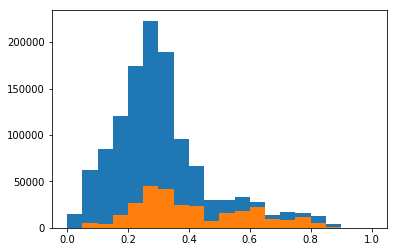

In [55]:
# check histogram
bins_num=20
game_name = 'soccer_away'
count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')

counts, middiam, objs = plt.hist(count_df.iloc[:,0],range=(0,1),bins=bins_num)
win_counts, middiam, objs = plt.hist(count_df[count_df['HOME_WIN']==True].iloc[:,0],range=(0,1),bins=bins_num)
# the percentage of winners
perc_winners = win_counts/(counts+1e-8)
time_period = (middiam[1]-middiam[0])/2
probabilities = [i + time_period for i in middiam[:-1]]

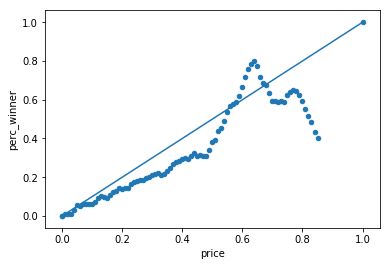

In [84]:
windows_weight = 0.05
for game_name in [ 'soccer_away']:
# for game_name in [ 'soccer_home','soccer_away','soccer_draw']:
    count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')
    perc_ = generate_percentage_winners(count_df,windows_weight,0,85)
    perc_.plot.scatter(x=0,y=1)
    plt.plot([0,1])
    perc_.to_csv(FLB_folder_path+'/'+game_name+'_fixed.csv',index=False)

### soccer draw

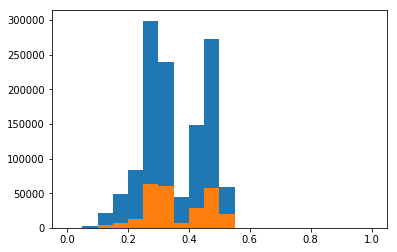

In [59]:
# check histogram
bins_num=20
game_name = 'soccer_draw'
count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')

counts, middiam, objs = plt.hist(count_df.iloc[:,0],range=(0,1),bins=bins_num)
win_counts, middiam, objs = plt.hist(count_df[count_df['HOME_WIN']==True].iloc[:,0],range=(0,1),bins=bins_num)
# the percentage of winners
perc_winners = win_counts/(counts+1e-8)
time_period = (middiam[1]-middiam[0])/2
probabilities = [i + time_period for i in middiam[:-1]]

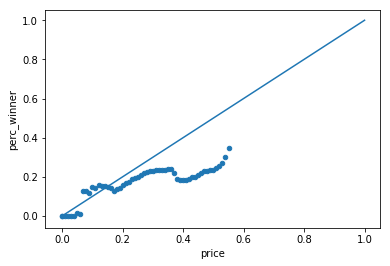

In [87]:
windows_weight = 0.05
for game_name in [ 'soccer_draw']:
# for game_name in [ 'soccer_home','soccer_away','soccer_draw']:
    count_df = pd.read_csv(FLB_folder_path+'/summary/'+game_name+'.csv').set_index('Unnamed: 0')
    perc_ = generate_percentage_winners(count_df,windows_weight,0,55).iloc[:-1,:]
    perc_.plot.scatter(x=0,y=1)
    plt.plot([0,1])
    perc_.to_csv(FLB_folder_path+'/'+game_name+'_fixed.csv',index=False)